# Structure of Analysis

Before diving into the analytics, let me provide an overview of the process I followed to ensure it is structured in a way that facilitates easy understanding. The process begins with importing the necessary libraries and establishing a connection to Google Drive, where this ipynb Notebook file is stored. The dataset files are also uploaded to the same directory and subsequently loaded into their respective dataframes.

The analysis is organized into three distinct stages:


1.   Data Explortion & Validation
2.   Data Analysis and Visualisation
3.   Data Augmentation

Detailed information about each stage, the steps followed, and comments on the results obtained can be found in the sections below, as each step is executed

In [ ]:
# importing libraries that are to be used throughout the analysis process

import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot

First and foremost thing to notice is that we have 2 data formats in the data file (CSV & JSON). We would be converting both of them to pandas data frame once w eload the data from all the files. It will provide us with a consistant structure for analysis and manipulation and simplify most operations such as filtering, grouping and merging in the later stages of analysis.

In [ ]:
# Connecting to google drive to read files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#listing all files in directly to verify we have all datafiles and colab file in the same directory
os.chdir('/content/drive/My Drive/Colab Notebooks')
!ls

 ass-5				       jcpenney_reviewers.json
 assign-5.ipynb			      'LHM task-1'
 Assignment04_01.ipynb		       products.csv
 Assignment04.ipynb		       reviews.csv
 Association_rules.ipynb	       Sales-tracker-2022.ipynb
 BD2_JCPenney_Individual-1.ipynb       solution.ipynb
 ClassTest.ipynb		       unemployment_rate_map.html
 datasetYouTubeNetwork.csv	       unemployment_rate_state.csv
'Final Assignment.ipynb'	       Untitled
'Final Assignment Webscraping.ipynb'   users.csv
 jcpenney_products.json


The JSON files we are working with require reading multiple JSON objects individually, as each row in the file represents a separate JSON object rather than a JSON array.

To handle this, the code below processes each JSON object line by line, parsing and storing them into two separate variables: json_products_data and json_reviewers_data.


In [ ]:
#reading all JSON objects in file line by line.
with open('jcpenney_products.json', 'r') as f:
    json_products_data = [json.loads(line) for line in f]
with open('jcpenney_reviewers.json', 'r') as f:
    json_reviewers_data = [json.loads(line) for line in f]

In [ ]:
#Converting the parsed JSON data into pandas DataFrames
json_products_df = pd.json_normalize(json_products_data)
json_reviewers_df = pd.json_normalize(json_reviewers_data)

We have successfully loaded the JSON files into dataframes. Next, we will focus on importing the CSV data files into dataframes, which is a more straightforward process compared to handling the JSON files.

In [ ]:
# Using read_csv() to loads csv data direcctly to pandas dataframe
csv_products_df = pd.read_csv('products.csv')
csv_users_df = pd.read_csv('users.csv')
csv_reviews_df = pd.read_csv('reviews.csv')

Once the data has been loaded, lets start by looking at the genral structure of the dfs we have using the shape funtion

# Data Exploration and Validation

This stage involves steps aimed at gaining a deeper understanding of the structure and shape of the data in our dataframes. We will identify any discrepancies, logical inconsistencies, and issues within the data, and take appropriate actions to clean and refine it. This will ensure the dataset is well-prepared for the analysis in the subsequent stages.

In [ ]:
# .shape is a built-in function that returns number of records and noumber of column for a df. Helps in understanding the highlevel structure

print ('Structure of JSON Product data:',json_products_df.shape)
print ('Structure of JSON Reviewers data:',json_reviewers_df.shape)
print ('Structure of CSV Product data:',csv_products_df.shape)
print ('Structure of CSV Users data:',csv_users_df.shape)
print ('Structure of CSV Reviews data:',csv_reviews_df.shape)

Structure of JSON Product data: (7982, 15)
Structure of JSON Reviewers data: (5000, 4)
Structure of CSV Product data: (7982, 6)
Structure of CSV Users data: (5000, 3)
Structure of CSV Reviews data: (39063, 4)


Next, let's delve deeper into the details of the dataframes to better understand their structure and the relationships between them. This will provide us with a clearer understanding of how the data is organized.

In [ ]:
# .info() is also a built in function which helps to analyze data types and Non-Null counts
json_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uniq_id                 7982 non-null   object 
 1   sku                     7982 non-null   object 
 2   name_title              7982 non-null   object 
 3   description             7982 non-null   object 
 4   list_price              7982 non-null   object 
 5   sale_price              7982 non-null   object 
 6   category                7982 non-null   object 
 7   category_tree           7982 non-null   object 
 8   average_product_rating  7982 non-null   float64
 9   product_url             7982 non-null   object 
 10  product_image_urls      7982 non-null   object 
 11  brand                   7982 non-null   object 
 12  total_number_reviews    7982 non-null   int64  
 13  Reviews                 7982 non-null   object 
 14  Bought With             7982 non-null   

It is important to note that the list_price and sales_price columns currently have the data type object, whereas they should ideally be converted to float64 (similar to the average_product_rating column).
Additionally, there are no missing values in this dataframe.


In [ ]:
# Converting the 'list_price' and 'sale_price' to numeric (float), handling errors by coercing invalid values to NaN
json_products_df['list_price'] = pd.to_numeric(json_products_df['list_price'], errors='coerce')
json_products_df['sale_price'] = pd.to_numeric(json_products_df['sale_price'], errors='coerce')

In [ ]:
json_reviewers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
 3   Reviewed  5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


No Missing values found here. But prefereably DOB column should be converted to Date type.

In [ ]:
# Now Converting 'DOB' column to datetime type
json_reviewers_df['DOB'] = pd.to_datetime(json_reviewers_df['DOB'], dayfirst=True, errors='coerce')

In [ ]:
# Understanding Column information and data types for the csv dfs
print(csv_products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB
None


In [ ]:
# Checking the NULL couns for each column
print(csv_products_df.isnull().sum())

Uniq_id           0
SKU              67
Name              0
Description     543
Price          2166
Av_Score          0
dtype: int64


Upon exploring the CSV dataframes, several interesting observations arise. It is evident that the csv_products_df contains a number of NULL values in the Price column. Specifically, while there are 7,982 non-null Uniq_id values, only 5,816 rows in the Price column are non-null.

Additionally, the SKU and Description columns also show discrepancies when compared to the total number of rows, particularly with respect to the Uniq_id column.

In [ ]:
print(csv_users_df.info())
print(csv_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None



No Null value is observed in these dataframe. Additionally, DOB needs to be converted from object to Date format.

In [ ]:
# Converting 'DOB' column in csv_users_df to datetime type
csv_users_df['DOB'] = pd.to_datetime(csv_users_df['DOB'], dayfirst=True, errors='coerce')

Lets have a quick check to see how many duplicates do we have in our data using *duplicated()* function from pandas.

In [ ]:
# It is one of pandas predefined library function that helps check for any duplictate values.
print( 'Duplicates in Users.csv file')
print(csv_users_df.duplicated().sum())

print( 'Duplicates in Products.csv file')
print(csv_products_df.duplicated().sum())

print( 'Duplicates in Review.csv file')
print(csv_reviews_df.duplicated().sum())

Duplicates in Users.csv file
0
Duplicates in Products.csv file
0
Duplicates in Review.csv file
0


No Duplicates to be found in the data

One of the powerfull tool used in generating summary statistics of the dataframe is *.describe()*. Now using this build up fucntion we would understand the distribution and characteristics of the data

In [ ]:
csv_products_df.describe(include="all")

,Uniq_id,SKU,Name,Description,Price,Av_Score
count,7982,7915,7982,7439,5816.000000,7982.000000
unique,7982,6043,6001,5619,NaN,NaN
top,b6c0b6bea69c722939585baeac73c13d,pp5006210554,Champion® Vapor Shorts - Big & Tall,Stay comfortable and looking great all day wit...,NaN,NaN
freq,1,18,23,30,NaN,NaN
mean,NaN,NaN,NaN,NaN,144.776618,2.988683
std,NaN,NaN,NaN,NaN,499.223719,0.911673
min,NaN,NaN,NaN,NaN,-65.270000,1.000000
25%,NaN,NaN,NaN,NaN,40.700000,2.500000
50%,NaN,NaN,NaN,NaN,58.010000,3.000000
75%,NaN,NaN,NaN,NaN,87.020000,3.500000


A notable issue observed in the Price column is the presence of negative values, which appear to be logically inconsistent, as prices cannot be negative. To gain a clearer understanding, let's check the count of these negative values within the column.

In [ ]:
# Checking the count for the values of zero and less than zero in the 'Price' column
print(csv_products_df[csv_products_df['Price'] <= 0].shape[0])

44


Given the discrepancies observed in the Price column, it would be beneficial to visualize the distribution of price values using a scatter plot for a clearer understanding.

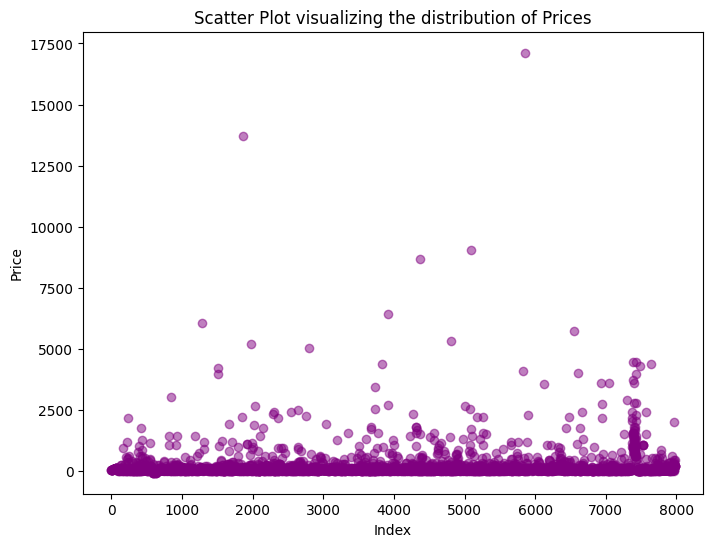

In [ ]:
# plotting the scatter graph using matplotlib library.

plt.figure(figsize=(8, 6))
plt.scatter(csv_products_df.index, csv_products_df['Price'], alpha=0.5, color='purple')
plt.title('Scatter Plot visualizing the distribution of Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

The graph above provides a clear visualization of the outliers in the Price column. It reveals several values below zero, as well as unusually large values, both of which are likely outliers in the dataset.

The presence of negative values in this column appears inconsistent with the expected data. However, any action to address this issue depends on the business logic and requires further clarification. Since these 44 rows may be critical to the data we are working with, it would be prudent to consult with the business team before making any decisions. Therefore, we should refrain from removing these rows at this stage.

In [ ]:
# Checking for any values that are beyond the range 1-5 in Avg_Score column
print(csv_products_df[(csv_products_df['Av_Score'] < 1) | (csv_products_df['Av_Score'] > 5)].shape[0])

0


Av_Score looks good but there is inconsistency with the values in Price column.

In [ ]:
json_products_df.describe(include="all")

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
count,7982,7982,7982,7982,5816.000000,7719.000000,7982,7982,7982.000000,7982,7982,7982,7982.000000,7982,7982
unique,7982,6044,6002,5620,NaN,NaN,1169,1997,NaN,7982,6519,721,NaN,7982,7982
top,b6c0b6bea69c722939585baeac73c13d,,Champion® Vapor Shorts - Big & Tall,,NaN,NaN,,,NaN,http://www.jcpenney.com/alfred-dunner-essentia...,,ARIZONA,NaN,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
freq,1,67,23,543,NaN,NaN,636,636,NaN,1,157,413,NaN,1,1
mean,NaN,NaN,NaN,NaN,144.776618,101.605623,NaN,NaN,2.988683,NaN,NaN,NaN,4.893886,NaN,NaN
std,NaN,NaN,NaN,NaN,499.223719,360.965606,NaN,NaN,0.911673,NaN,NaN,NaN,3.314284,NaN,NaN
min,NaN,NaN,NaN,NaN,-65.270000,3.610000,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.700000,22.950000,NaN,NaN,2.500000,NaN,NaN,NaN,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,58.010000,35.460000,NaN,NaN,3.000000,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,87.020000,60.420000,NaN,NaN,3.500000,NaN,NaN,NaN,8.000000,NaN,NaN


There appears to be a mismatch between the total number of SKUs and the number of unique SKUs. However, since the SKU is not the key column in the dataframe, this discrepancy can be expected, as the same SKU may be associated with products of different colors or sizes.

In [ ]:
# Checking to see if the sale price is greater than the list price
invalid_prices_count = json_products_df[json_products_df['sale_price'] > json_products_df['list_price']].shape[0]
invalid_prices_count

44

In the above output, 3020 rows can be found that show error in thepricing. This could result probably due to the missing list_price for large number of rows too.

In [ ]:
json_reviewers_df.describe(include="all")

,Username,DOB,State,Reviewed
count,5000,5000,5000,5000
unique,4999,NaN,57,4030
top,dqft3311,NaN,Massachusetts,[]
freq,2,NaN,107,971
mean,NaN,1975-10-28 03:53:16.800000,NaN,NaN
min,NaN,1950-08-08 00:00:00,NaN,NaN
25%,NaN,1962-08-05 00:00:00,NaN,NaN
50%,NaN,1975-08-02 00:00:00,NaN,NaN
75%,NaN,1988-07-29 00:00:00,NaN,NaN
max,NaN,2001-07-26 00:00:00,NaN,NaN


In [ ]:
csv_users_df.describe(include="all")

,Username,DOB,State
count,5000,5000,5000
unique,4999,NaN,57
top,dqft3311,NaN,Massachusetts
freq,2,NaN,107
mean,NaN,1975-10-28 03:53:16.800000,NaN
min,NaN,1950-08-08 00:00:00,NaN
25%,NaN,1962-08-05 00:00:00,NaN
50%,NaN,1975-08-02 00:00:00,NaN
75%,NaN,1988-07-29 00:00:00,NaN
max,NaN,2001-07-26 00:00:00,NaN


In [ ]:
csv_reviews_df.describe(include="all")

,Uniq_id,Username,Score,Review
count,39063,39063,39063.000000,39063
unique,7982,4993,NaN,29463
top,7376425db74399716d23f1cc0c59684c,melu4112,NaN,I love Clarks shoes. This is the fourth pair i...
freq,23,20,NaN,18
mean,NaN,NaN,1.487648,NaN
std,NaN,NaN,1.400332,NaN
min,NaN,NaN,0.000000,NaN
25%,NaN,NaN,0.000000,NaN
50%,NaN,NaN,1.000000,NaN
75%,NaN,NaN,2.000000,NaN


In [ ]:
# For understanding the data clearly I checked the counts of the top 50 most frequent reviews in the 'Review' column.
print(csv_reviews_df['Review'].value_counts().head(50).values)


[18 18 18 18 18 18 18 18 16 16 16 16 16 16 16 16 16 15 15 13 12 12 12 12
 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 10 10 10 10
 10 10]


Let's explore the csv_reviews_df to examine the distribution of ratings. This will provide valuable insights into the sentiments expressed by users about JCPenney.

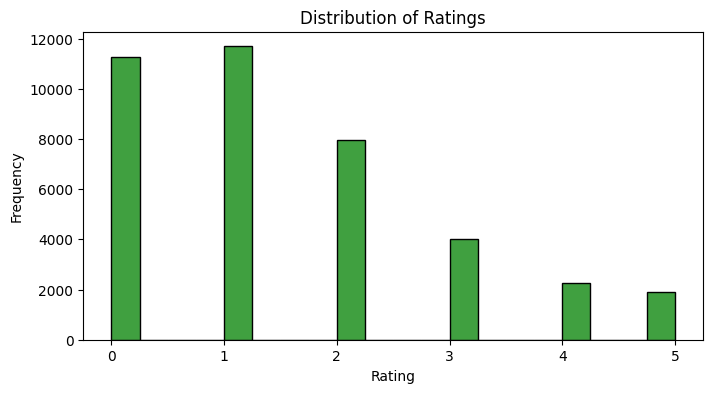

In [ ]:
# Ploting the histogram graph of ratings distibution
plt.figure(figsize=(8, 4))
sns.histplot(csv_reviews_df['Score'], color='Green', bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The graph above clearly shows that most of the ratings are concentrated towards the lower end, indicating a leftward skew in the distribution.

It is evident that the highest frequency of ratings is 1, followed closely by 0, suggesting that the overall sentiment from users is negative.

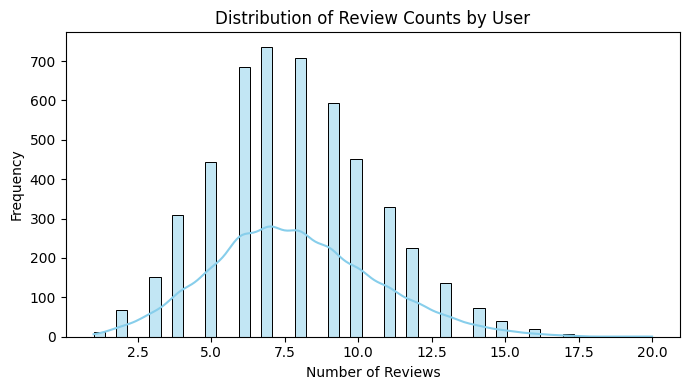

In [ ]:
#Counting the frequency of each unique user by username

frequent_users_df = csv_reviews_df['Username'].value_counts()
plt.figure(figsize=(7, 4))
sns.histplot(frequent_users_df, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Counts by User')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


*** Key Observations ***

After reviewing the five dataframes, several key observations can be made:

-> Missing Values: The csv_products_df dataframe contains missing values, with significant gaps in the Price (2166 missing) and SKU (67 missing) columns. Removing rows with these missing values is not advisable due to the large number of affected rows, which could negatively impact the data accuracy.

-> No Duplicates: No duplicates have been identified within the data.

-> Data Type Inconsistencies: There are some inconsistencies in data types. For instance, the list_price and sale_price columns should have a float data type, while the DOB column should be in a Date format.

->Logical Inconsistencies: The Price column in csv_products_df contains negative values, which appear abnormal unless there is a specific business logic justifying such entries.

-> Sale Price Greater than List Price: In the json_products_df, a large number of rows show instances where the sale_price is greater than the list_price, which warrants further investigation.

-> Key Columns for Merging: The uniq_id and username columns are the critical identifiers for merging the datasets during the analysis.

# Data Analysis & Visualisation

To proceed effectively, we will start by identifying the key business questions that are crucial for guiding strategic decisions and driving JCPenney's growth. These questions will help us focus on the most important areas for analysis.

Once these critical questions are established, we will integrate the relevant data from the previously collected dataframes. By leveraging appropriate visualizations, we will perform a comprehensive analysis to extract actionable insights that will inform decision-making and support the company's strategic initiatives.


Let's begin by examining the relationship between product price and product ratings to identify any patterns that could aid JCPenney in making informed decisions.

**Q: How can the pricing of a product affect its rating?**

To explore this, we will merge the json_products_df and csv_reviews_df DataFrames using the uniq_id column, which serves as the key in both DataFrames. Following the merge, we will visualize the relationship using a scatter plot to better understand the correlation between price and product

In [ ]:
# Merge product data and reviews data using 'Uniq_id' as the common key
merged_product_reviews = pd.merge(json_products_df, csv_reviews_df, left_on='uniq_id', right_on='Uniq_id', how='inner')


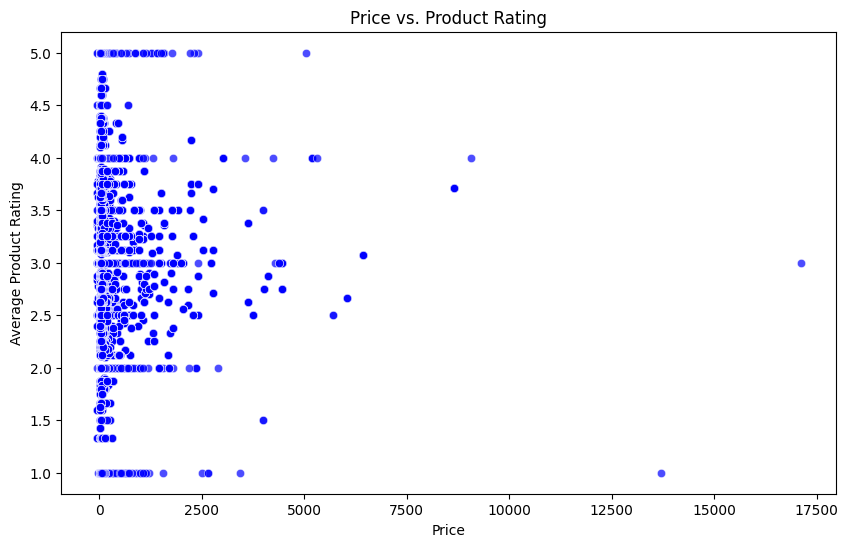

In [ ]:
# Scatter plot of price vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='list_price', y='average_product_rating', data=merged_product_reviews, alpha=0.7, color='blue')
plt.title('Price vs. Product Rating')
plt.xlabel('Price')
plt.ylabel('Average Product Rating')
plt.show()

The graph indicates that products within the low-price range of 0-2500 receive the highest number of ratings, with a noticeable cluster around this range. This suggests that these products are particularly popular among users. Therefore, focusing on products priced below 2500, or potentially even below 2000, could be a strategic opportunity to target a larger segment of customers.

**Q: What is the Age Distribution of our Customers?**

Understanding the age distribution of customers has been crucial as it would identify key opportunities for targeted marketing, allowing the business to tailor campaigns to specific demographics. Additionally, the age distribution might be helpful in highlighting which age groups are more interested in particular product categories, informing product strategy. Understanding the age of the core customer base, provided insights can guide the business in investing in customer retention strategies and attracting new customers

Since the dataset includes a Date of Birth (DOB) column, I will add a new column to the csv_users_df DataFrame that represents the age of each user, thereby eliminating the need to work directly with the DOB column.

In [ ]:
# Finding age from DOB column. Dtype was changed for this column earlier.
csv_users_df['Age'] = (pd.to_datetime('today') - csv_users_df['DOB']).dt.days // 365
csv_users_df[['Username', 'Age']].head()
csv_users_df['Age']

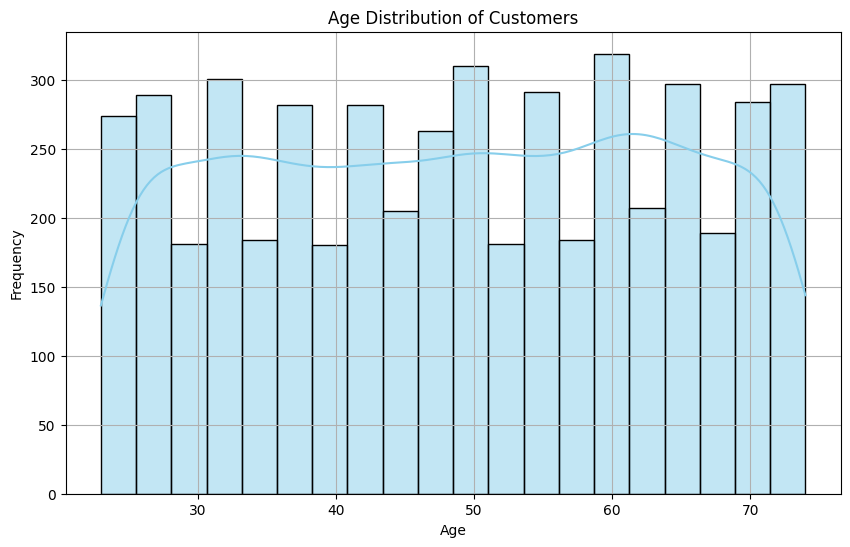

In [ ]:
# Plotting the age distribution as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(csv_users_df['Age'], kde=True, color='skyblue', bins=20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The bar graph above does not clearly highlight a specific age group that JCPenney could potentially target, as the frequency of customers between the ages of 30 and 65 appears to be nearly identical. This lack of distinction makes it challenging to identify a particular demographic within this age range that stands out as a prime target for the business.

To gain a clearer understanding of the age distribution and identify potential target demographics, we can use a box plot to visualize the spread and detect any outliers. This will allow us to pinpoint the age range with the highest frequency. Upon analyzing the plot, it becomes apparent that the age group between 35 and 60 is the most prominent segment, making it a key demographic for JCPenney to focus on.

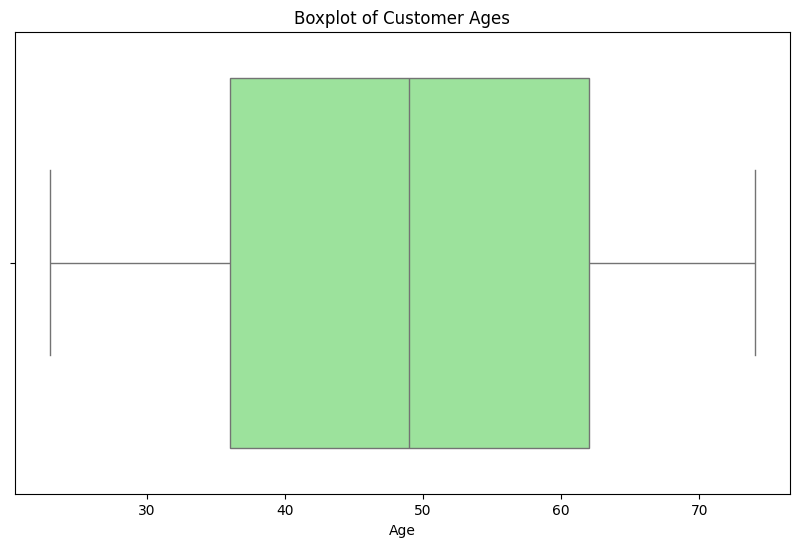

In [ ]:
# Plotting a Boxplot for age distribution to show spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=csv_users_df['Age'], color='lightgreen')
plt.title('Boxplot of Customer Ages')
plt.xlabel('Age')
plt.show()

The graph clearly identifies the most popular age range of JCPenney's customers, which is approximately between 35 and 62. This insight enables the business to focus its efforts on this demographic to drive higher revenue. Additionally, it highlights the age groups where JCPenney may need to increase engagement and tailor marketing strategies to boost sales.

**Q: What is the State-wise User Distribution?**

Understanding the state-wise distribution of users will be a crucial step in providing valuable insights. By identifying the states with the highest user concentration, we will be able to uncover key opportunities for geographic market segmentation, enabling the business to target specific regions for promotions or potential expansions.

In [ ]:
# Merging json_reviewers_df and csv_users_df on 'Username'
merged_user_data = pd.merge(json_reviewers_df, csv_users_df, on='Username', how='inner')

In [ ]:
# Count the number of users in each state
state_user_counts = merged_user_data['State_y'].value_counts().reset_index()
state_user_counts.columns = ['State', 'User_Count']

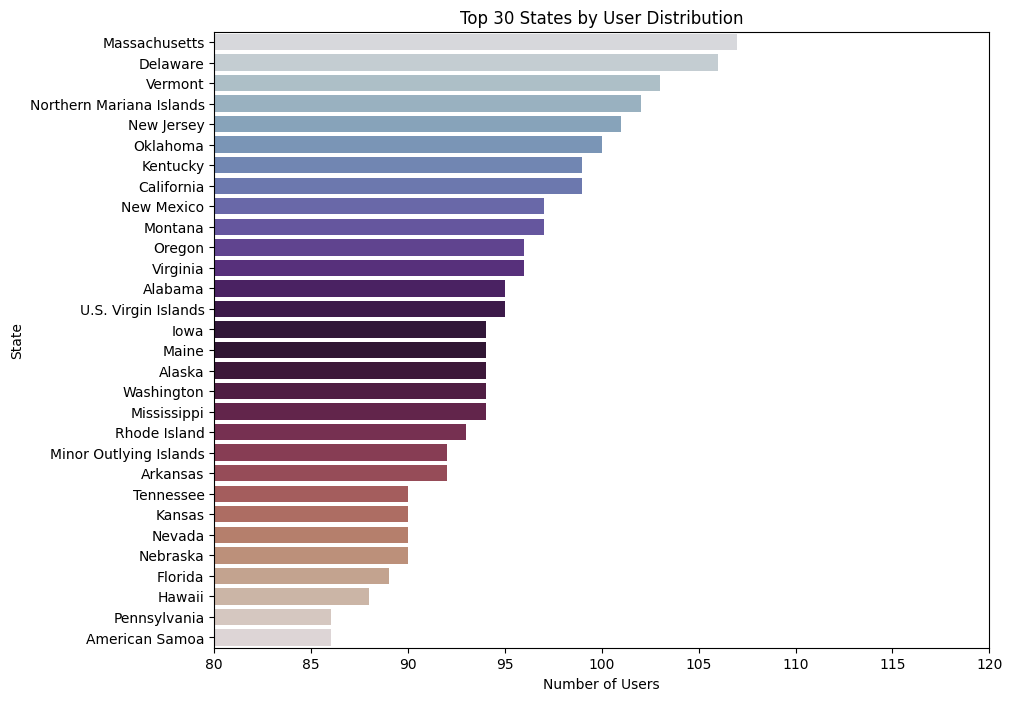

In [ ]:
# Create a horizontal bar plot to show the distribution of users by state
plt.figure(figsize=(10, 8))
sns.barplot(x='User_Count',
            y='State',
            data=state_user_counts.sort_values('User_Count', ascending=False).head(30),
            hue='State',  # Assign 'State' to 'hue' for color coding
            palette='twilight',
            legend=False)  # Disable the legend to avoid unnecessary display
plt.xlim(80, 120)
plt.title('Top 30 States by User Distribution')
plt.xlabel('Number of Users')
plt.ylabel('State')
plt.show()

The graph provides valuable insights into the distribution of users across different states (territories), offering a clear understanding of the regions JCPenney should target to attract more clients.


Additionally, having data on the locations of JCPenney stores within these states would further enhance the analysis, allowing for a more comprehensive validation of the findings.


**Q: How Have Users Rated Their Experience?**

The task at hand involves identifying the number of users who have rated their experience as "Very Bad," "Bad," "OK," or "Good" based on the score provided in the csv_reviews_df DataFrame. By categorizing the ratings into these sentiment groups, it can help gain valuable insights into the overall sentiment that users hold.

This process will allow to better understand the distribution of user sentiments and evaluate how users perceive their experiences

In [ ]:
# Categorizing the 'Score' column into 4 categories as Very Bad, Bad, OK, Good
def categorize_score(score):
    if score <= 1:
        return 'Very Bad'
    elif score == 2:
        return 'Bad'
    elif score == 3:
        return 'OK'
    else:
        return 'Good'

In [ ]:
# now applying the categorization function to the 'Score' column
merged_product_reviews['Score_Category'] = merged_product_reviews['Score'].apply(categorize_score)
# Counting the number of occurrences for each category we just created above
score_category_counts = merged_product_reviews['Score_Category'].value_counts()

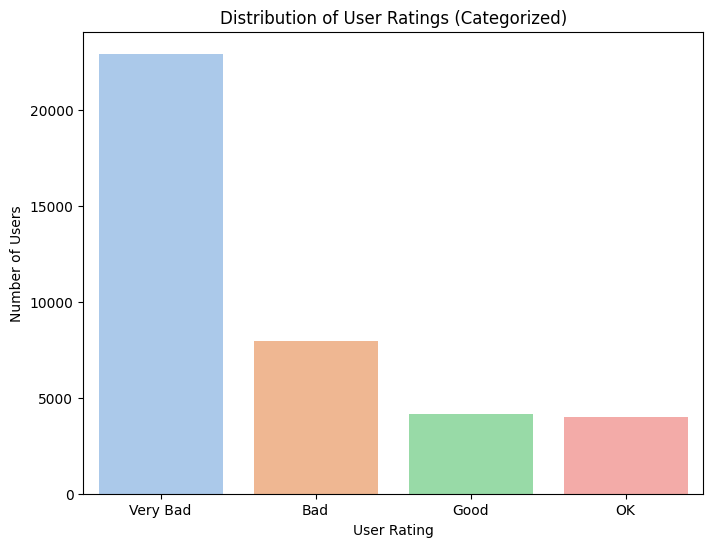

In [ ]:
#Now we Plot the distribution of scores using a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x=score_category_counts.index, y=score_category_counts.values, hue=score_category_counts.index,palette='pastel', legend=False)
plt.title('Distribution of User Ratings (Categorized)')
plt.xlabel('User Rating')
plt.ylabel('Number of Users')
plt.show()

This analysis reveals that customer sentiment towards the business is largely unfavorable, underscoring the need for a more in-depth investigation to uncover the underlying causes. To assist the business in addressing this, we have already examined the distribution of users across various states.

Moving forward, we can provide further insights by analyzing the categorical ratings received from each state. This will enable JCPenny to understand the geographic distribution of feedback, identify regional trends, and pinpoint specific areas that may require attention or improvement.

**Q: What is User Rating by state?**

In this analysis, we will leverage Plotly to create an interactive visualization, allowing for a more intuitive understanding of the trends and the distribution of sentiment categories across the top 30 states with the highest number of users. This interactive approach will enable the business to explore the data more effectively, identify regional patterns, and gain a deeper insight into how user sentiments vary across different states.

In [ ]:
merged_product_reviews_with_state = pd.merge(merged_product_reviews,json_reviewers_df[['Username', 'State']], on='Username',  how='inner')

In [ ]:
# Apply categorization to the merged data
merged_product_reviews_with_state['Rating_Category'] = merged_product_reviews_with_state['Score'].apply(categorize_score)
# Group by 'State' and 'Rating_Category' to get the count of ratings for each category in each state
state_rating_distribution = merged_product_reviews_with_state.groupby(['State', 'Rating_Category']).size().reset_index(name='Rating_Count')


In [ ]:
# Aggregate by 'State' to get total ratings per state, and select top 30 states with the highest total ratings
state_total_ratings = state_rating_distribution.groupby('State')['Rating_Count'].sum().reset_index()
top_30_states = state_total_ratings.sort_values('Rating_Count', ascending=False).head(30)['State']


In [ ]:
# Filter the data to include only the top 30 states
filtered_state_rating_distribution = state_rating_distribution[state_rating_distribution['State'].isin(top_30_states)]
fig = px.treemap(
    filtered_state_rating_distribution,
    path=['State', 'Rating_Category'],
    values='Rating_Count',
    color='Rating_Count',
    color_continuous_scale='Viridis',
    title='Treemap of Ratings Distribution by State and Rating Category (Top 30 States)'
)
fig.show()

The graph visually depicts the distribution of sentiments across the top 30 states, revealing a clear trend: a significant portion of users from nearly all states have rated their experience as "Very Bad." This provides the business with valuable insight, highlighting the need to focus on these states where negative sentiment is most prevalent, allowing for targeted improvements and deeper investigation into the underlying causes.

**NOTE:**

**After creating the interactive graph for rating categories by state using Plotly, I noticed that it did not appear in the exported PDF file. Upon further consideration, I decided to use a stacked bar graph created with Matplotlib to visualize the distribution of categories per state, ensuring compatibility with the export. However, I hve kept the original Plotly code for reference since i want to give a try to making interactive graph as was done in class lecture**




Below we have used the pivot_table for reshaping the data to create separate columns for each Rating_Category. This allows to aggregate the data which is summing the ratings for each category and organize it to that makes it suitable for plotting a stacked bar chart.

In [ ]:
# Creating a pivot table to aggregate rating counts by state and rating category
state_rating_pivot = state_rating_distribution.pivot_table(index='State', columns='Rating_Category', values='Rating_Count', aggfunc='sum')

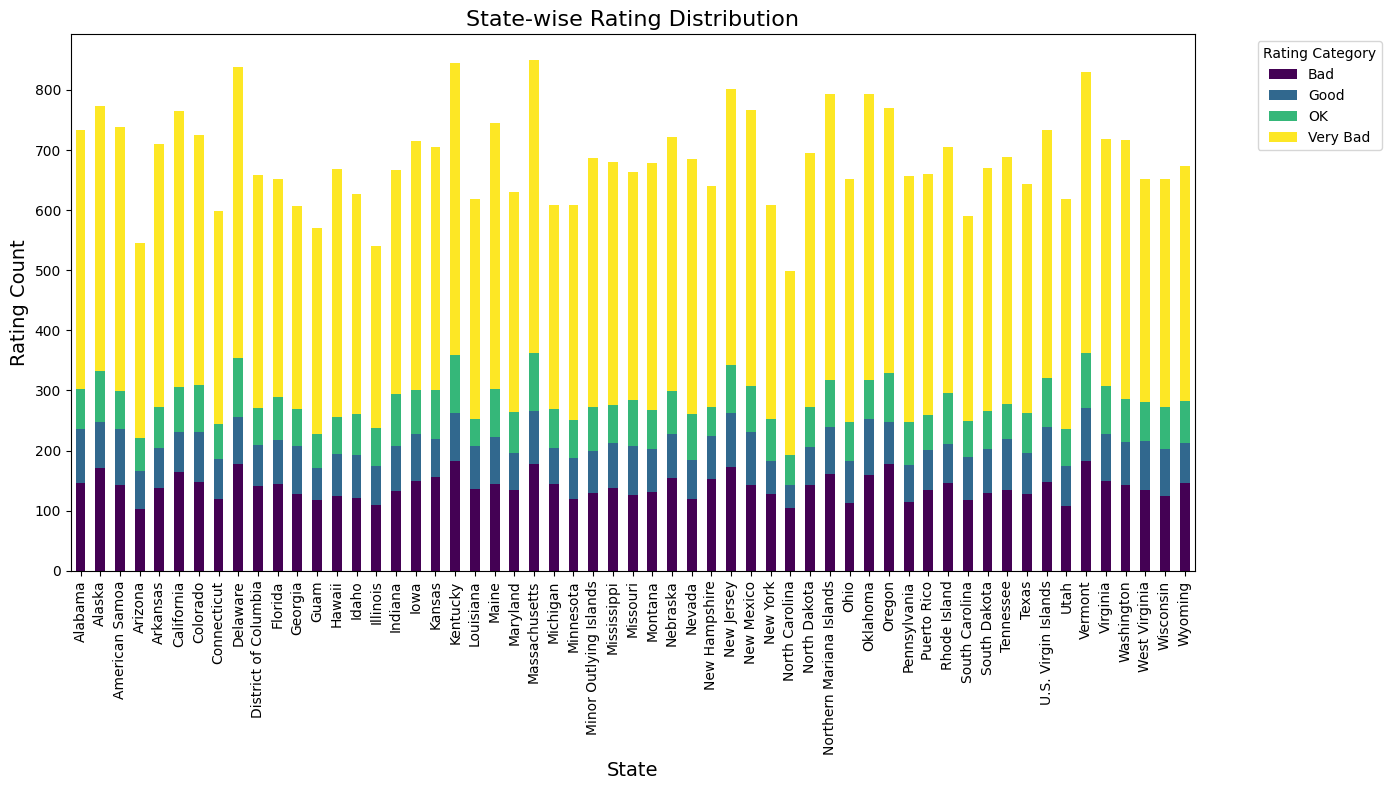

In [ ]:
#Making stacked bar graph using matplotlib
ax = state_rating_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('State-wise Rating Distribution', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Rating Count', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Rating Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Similar to the treemap, the stacked bar chart effectively illustrates the distribution of 'Very Bad', 'Bad', 'OK', and 'Good' ratings across each state. It clearly highlights that a significant proportion of 'Very Bad' ratings are present throughout all states, emphasizing a widespread negative sentiment.

**Q: What is the user rating by user Age group?**

Another useful categorization will focus on age groups and rating categories. This visualization will help identify which age group is most likely to express dissatisfaction compared to others. For this analysis, I will categorize age into four distinct bins: 18-25, 26-40, 41-55, and 55 and above.

This approach will allow us to better understand the relationship between age and sentiment, providing insights into which demographic segments may require more targeted attention or improvement in customer experience.

In [ ]:
#Merge the reviews dataframe with the users dataframe
merged_reviews_with_users = pd.merge(merged_product_reviews, csv_users_df[['Username', 'Age']], on='Username', how='left')


In [ ]:
# defining the function for Categorizeing users by age group we discussed above
def categorize_age(age):
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 40:
        return '26-40'
    elif 41 <= age <= 55:
        return '41-55'
    else:
        return '56 and above'

In [ ]:
#Applying the function to create a new column named 'Age Category' in the already merged datafram
merged_reviews_with_users['Age_Category'] = merged_reviews_with_users['Age'].apply(categorize_age)

#Now Grouping by 'Age_Category' and 'Score_Category' to get the count of ratings for each category
age_rating_distribution = merged_reviews_with_users.groupby(['Age_Category', 'Score_Category']).size().reset_index(name='Rating_Count')

In [ ]:
#Pivoting the data to make it suitable for a stacked bar chart
age_rating_pivot = age_rating_distribution.pivot_table(index='Age_Category', columns='Score_Category', values='Rating_Count', aggfunc='sum', fill_value=0)


<Figure size 1000x600 with 0 Axes>

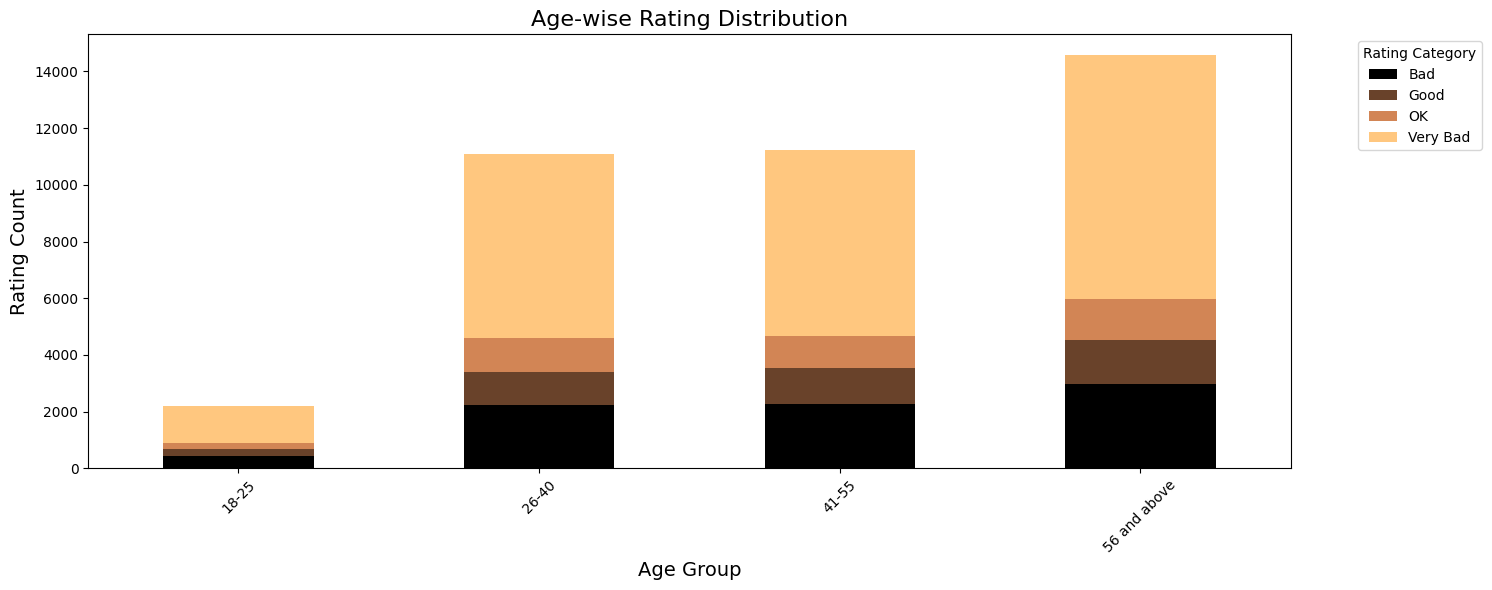

In [ ]:
#Ploting the stacked bar chart
plt.figure(figsize=(10, 6))
age_rating_pivot.plot(kind='bar', stacked=True, colormap='copper', figsize=(15, 6))
plt.title('Age-wise Rating Distribution', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Rating Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Rating Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The graph clearly highlights that a substantial proportion of users across all age groups have expressed dissatisfaction, as evidenced by the high volume of 'Very Bad' ratings. Particularly noteworthy is the fact that the highest frequency of 'Very Bad' ratings comes from customers aged 56 and above, which correlates with the larger customer base in this age group. This insight suggests that JCPenney may need to focus on addressing the concerns of this demographic to improve overall customer satisfaction.

With the final visualization above, the "Visualization and Analysis" stage concludes. This section has addressed all relevant questions, providing thorough analysis and visualizations that offer a clear understanding of the results and the current position of the business.

**IMPORTANT NOTE**

While there are numerous additional questions that could have been explored to provide valuable insights for JCPenney, two key limitations must be considered:

1.   **Data Limitations:** The datasets available lack crucial information such as yearly data, order dates and times, store locations, and order types. Having access to this additional data would enable a more in-depth analysis and a clearer understanding of customer behavior and trends.
2.   **Business Focus:** The questions posed must align with JCPenney's strategic goals and focus areas. Understanding the business's priorities allows for more targeted and actionable insights.


For instance, valuable questions could include analyzing the popularity of different product categories across various age groups and states.

Similarly, assessing brand popularity by age group and geographic region would be insightful. Another critical question could be related to sales performance by product category, which would help JCPenney optimize inventory management and improve in-store processes.

Ultimately, data analysis is always influenced by both the available data and the business objectives. A clear focus and comprehensive data are essential for producing actionable insights.


# Data Augmentation

In this section, I aim to take the analysis we just done above in the previous section, to the next stage. Which means that we have looked into different questions bove that included


Q: How can the pricing of a product affect its rating?

Q: What is the Age Distribution of our Customers?

Q: What is the State-wise User Distribution?

Q: How have Users Rated Their Experience?

Q: What is User Rating by state?

After the analysis we have fgured out that there is dissatisfaction among the clients towards JCPenny which is not limited to few states or area.

**Limitations**

It is clear that the current dataset lacks critical information necessary to comprehensively address key questions and conduct a thorough analysis of the root causes of customer dissatisfaction. For example, additional data such as delivery information, product purchase dates, and purchase methods (online vs. in-store) would have significantly enhanced the ability to explore these issues in greater detail. Furthermore, collaborating with JCPenney to obtain specific business insights would have enabled a more focused analysis of product categories and allowed for a more targeted exploration of customer concerns, ultimately leading to more actionable and impactful recommendations.

**Recomendations**

To gain a deeper understanding of the factors driving customer dissatisfaction, it is essential to enhance the existing dataset with additional external data that provides valuable context. Key areas to explore include economic indicators such as GDP, unemployment, and inflation, which can shed light on regional spending patterns and consumer behavior. A competitor analysis comparing JCPenney’s pricing, customer service, and overall performance with brands like Walmart, Target, and Macy’s would offer valuable insights. Additionally, customer service data—such as response times and complaint volumes—could reveal potential service-related issues. Shipping and delivery performance data might uncover delays that are negatively impacting customer satisfaction, while product quality concerns, such as stockouts or defective items, may also be contributing to negative sentiment. However, given the current limitations of the dataset, particularly the lack of key information regarding JCPenney for direct comparison, we will explore alternative approaches to uncover further insights.


Here we bring in data for the unemploment rate for each state for the analysis.

In [ ]:
csv_unemp_df = pd.read_csv('unemployment_rate_state.csv')

In [ ]:
# Dropping the rank column as it doesnot concern us
csv_unemp_df = csv_unemp_df.drop(columns=['Rank'])
csv_unemp_df


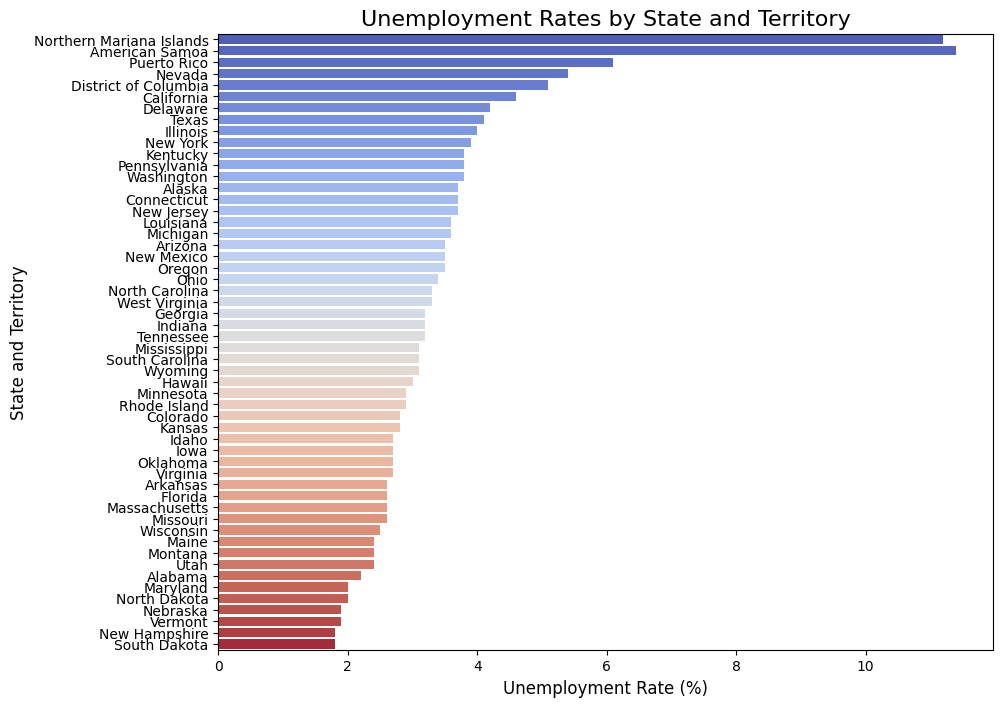

In [ ]:
#Plotting graph here to visualise unemployment rate by state
plt.figure(figsize=(10, 8))
sns.barplot(y='State and Territory', x='Seasonally adjusted rates', data=csv_unemp_df, hue='State and Territory',palette='coolwarm', legend=False)
plt.title('Unemployment Rates by State and Territory', fontsize=16)
plt.xlabel('Unemployment Rate (%)', fontsize=12)
plt.ylabel('State and Territory', fontsize=12)
plt.show()

In [ ]:
#Checking the unique State values in previous df and the new one we loaded.
print(csv_unemp_df['State and Territory'].nunique())
print(json_reviewers_df['State'].nunique())

54
57


In [ ]:
# Get unique values from each dataframe and making new df to make analysis on
reviewers_states = json_reviewers_df['State'].unique()
unemp_states = csv_unemp_df['State and Territory'].unique()

reviewers_only = set(reviewers_states) - set(unemp_states)
unemp_only = set(unemp_states) - set(reviewers_states)

states_diff = reviewers_only.union(unemp_only)
states_diff

{'Guam', 'Minor Outlying Islands', 'U.S. Virgin Islands'}

In [ ]:
# Merging our previous reviews data that included state information with new unemployment data on State and Territory
common_states_df = pd.merge(json_reviewers_df, csv_unemp_df, left_on='State', right_on='State and Territory')
common_states_df

,Username,DOB,State,Reviewed,State and Territory,Seasonally adjusted rates
0,bkpn1412,1983-07-31,Oregon,[cea76118f6a9110a893de2b7654319c0],Oregon,3.5
1,gqjs4414,1998-07-27,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3],Massachusetts,2.6
2,eehe1434,1950-08-08,Idaho,[],Idaho,2.7
3,hkxj1334,1969-08-03,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6...",Florida,2.6
4,jjbd1412,2001-07-26,Georgia,[],Georgia,3.2
...,...,...,...,...,...,...
4735,mfnn1212,1997-07-27,Delaware,[d6cd506246bd17afa611b6a06236713c],Delaware,4.2
4736,ejnb3414,1976-08-01,Minnesota,[97de1506cd0bcbe50f2797cd0588eb81],Minnesota,2.9
4737,pdzw1433,1994-07-28,Ohio,"[799d62906019d910fa744987da184ae7, b8f5deb7b02...",Ohio,3.4
4738,npha1342,1953-08-07,Montana,[6250b1d691cd3842f05b87736f2fadbf],Montana,2.4


In [ ]:
# Ensuring that 'DOB' is in datetime format by using inbuilt 'to_datetime' function again. And calculating age to include the age column in our new datafram
common_states_df['DOB'] = pd.to_datetime(common_states_df['DOB'])
current_year = pd.to_datetime('today').year
common_states_df['Age'] = current_year - common_states_df['DOB'].dt.year

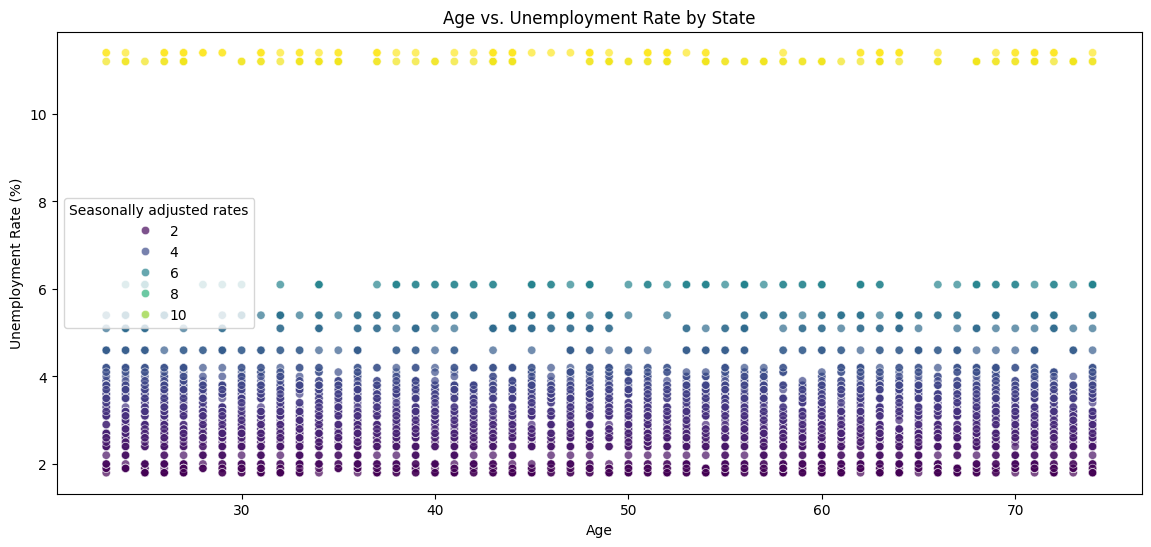

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Age', y='Seasonally adjusted rates', data=common_states_df, hue='Seasonally adjusted rates', palette='viridis', alpha=0.7)
plt.title('Age vs. Unemployment Rate by State')
plt.xlabel('Age')
plt.ylabel('Unemployment Rate (%)')
plt.show()

The unemployment rate appears to be distributed relatively evenly across different age groups, with no clear trend emerging. This suggests that the rate of unemployment is not significantly skewed towards any particular age group, and further analysis may be required to uncover any potential underlying patterns.

lets understand the unemploymnt rate distribution by Rating category. For which we need to merge state_rating_distribution which we have already in the df to our new df csv_unemp_df.

In [ ]:
merged_df = pd.merge(state_rating_distribution, csv_unemp_df, left_on='State', right_on='State and Territory', how='inner')


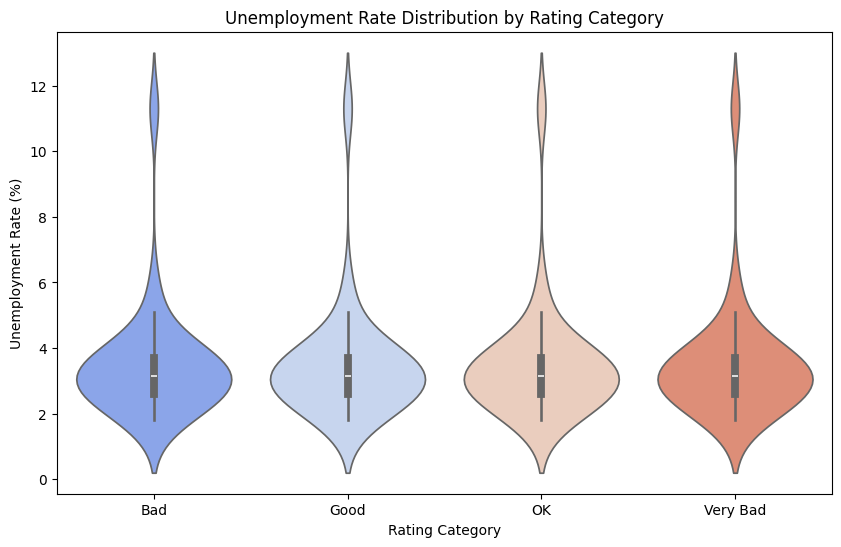

In [ ]:
# Assuming 'Rating_Category' column is already in the common_states_df
plt.figure(figsize=(10, 6))
sns.violinplot(x='Rating_Category', y='Seasonally adjusted rates', data=merged_df, hue='Rating_Category',palette='coolwarm', legend=False)
plt.title('Unemployment Rate Distribution by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Unemployment Rate (%)')
plt.show()

This concludes our analysis, where we have discussed the key findings, identified limitations, and highlighted potential areas for improvement at each stage of the process. While the analysis provides valuable insights, it is important to note that there are no limits to further exploration, especially if we had access to more detailed data. With comprehensive data, a deeper and more nuanced understanding could be achieved, driving more informed business decisions.